# Librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import feature_extraction
import nltk
from nltk import sent_tokenize 
from nltk.tokenize import word_tokenize,MWETokenizer 
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
import spacy
from spacy.util import filter_spans
from spacy.tokens import Span
from spacy.matcher import Matcher
from spacy import displacy
from IPython.display import HTML, display
import gensim
# nltk.download('all')
# nltk.download('maxent_ne_chunker')
# nltk.download('words')
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

In [2]:
nlp = spacy.load("en_core_web_lg")
nlp.Defaults.stop_words |= {"or","per","like",'-','_','','–','[]','\n','\n\n','\n\n ','i.e.'}
stopWords= spacy.lang.en.stop_words.STOP_WORDS #set(stopwords.words('english'))
# stop_words

# Read data

In [3]:
job_description = pd.read_csv("data/unbalanced.csv")
job_description.head()

,Content,source,job_title,label
0,Infoserv LLC\nData Scientist\nRemote\nEmployer...,glassdoor,Data Scientist,job_description
1,"ExxonMobil\n3.1\nData Scientist\nClinton, NJ\n...",glassdoor,Data Scientist,job_description
2,eBay Inc.\n4.1\nData Scientist/Applied Researc...,glassdoor,Data Scientist,job_description
3,"TikTok\n3.7\nData Scientist, University Gradua...",glassdoor,Data Scientist,job_description
4,"Mastercard\n4.3\nData Scientist, AI Services -...",glassdoor,Data Scientist,job_description


# Tokenisation

In [61]:
def nlp_spacy(text):
        """
        Tokenize the text
        Args: text
            text:

        Returns: list of tokens

        """
        return nlp(text)

In [4]:
first_job = job_description['Content'][0]
type(first_job)

str

In [63]:
first_token = nlp(first_job)
# first_token=list(str(first_token).split())
print(first_token)

Infoserv LLC
Data Scientist
Remote
Employer Provided Salary:$30.00 - $35.00 Per Hour

 Only W2 candidates right now we are unable to work with the employer
Programming Skills – knowledge of statistical programming languages like R, Python, and database query languages like SQL, Hive, Pig is desirable. Familiarity with Scala, Java, or C++ is an added advantage.
Job Type: Contract
Pay: $30.00 - $35.00 per hour
Schedule:
8 hour shift
Supplemental pay types:
Bonus pay
Work Location: Remote


In [6]:
# tokens = [tok.text for tok in first_token if not tok.is_punct]
# tokens

# Text Normalization using spaCy

In [7]:
def lemmatize_word(text):
    """ lemmatise words to give his root for example did becomes do
        input: text that contains Tokens
        output: A list of lemmatized tokens
        """
    lemma_word = [] 
    for token in text:
        lemma_word.append(token.lemma_)
    return lemma_word

In [8]:
lemmatize_text = lemmatize_word(first_token)
# lemmatize_text

# Split words that ontains character

In [9]:
def check_character_in_words(text):
     """ Split words that ontains character and correct them 
    input: A list of tokens with characters
    output: A list of tokens splitted on the character
    """
    checked_text =[]
    charact = ["\n", ":", '$']
    for words in text:
        for chars in charact:
            if chars in words:
                text.remove(words)
                words = words.replace(chars," ")
                words = words.split()
                
#                 if len(words[1]<1)
                text.extend(words)
#     text = str(text).strip()
#     text = remove_stopword(text,stopWords)
    return text #checked_text

In [10]:
checked_text = check_character_in_words(lemmatize_text)

# Remove Punctuation

In [11]:
def remove_punct(text):
"""
Remove punctuation from text (List of tokens)
input: A list of tokens with punctuation
output: A list of tokens without punctuation
"""
#     str_tokens = str(text).split()
#     text = list(map(lambda s: s.strip(r'\n $'), text))
    l=[]
    for word in text:
        if not word in string.punctuation:
            l.append(word)
    resultat=" ".join(l)  
   
    return l

In [12]:
removed_punctuation_text = remove_punct(checked_text)
print(removed_punctuation_text)

['Infoserv', 'LLC', 'Data', 'Scientist', 'Remote', 'Employer', 'provide', '35.00', 'per', 'hour', 'Only', 'W2', 'candidate', 'right', 'now', 'we', 'be', 'unable', 'to', 'work', 'with', 'the', 'employer', 'Programming', 'skill', '–', 'knowledge', 'of', 'statistical', 'programming', 'language', 'like', 'R', 'Python', 'and', 'database', 'query', 'language', 'like', 'SQL', 'Hive', 'Pig', 'be', 'desirable', 'familiarity', 'with', 'Scala', 'Java', 'or', 'C++', 'be', 'an', 'add', 'advantage', 'job', 'type', 'contract', 'pay', '30.00', '35.00', 'per', 'hour', 'schedule', '8', 'hour', 'shift', 'supplemental', 'pay', 'type', '\n', 'bonus', 'pay', '\n', 'work', 'location', 'remote', 'salary', '30.00']


In [13]:
# checked_text

# Remove stop words

In [14]:
def remove_stopword(liste,stopWords):
    """
        Remove stopwords from a list of tokens
        input:A list of tokens with stopwords
        output:A list of tokens without stopwords
        """
#     str_tokens = str(text).split()
    list_tokens = [tok.lower() for tok in liste]
    l=[]
    for word in list_tokens:
#         if  word not in string.punctuation:   
        if word not in stopWords:
            l.append(word)
    resultat=" ".join(l) 
#     l = list(map(lambda s: s.strip(), l))
    return l

In [15]:
removed_stopwords_punctuation = remove_stopword(removed_punctuation_text,stopWords)
removed_stopwords_punctuation

['infoserv',
 'llc',
 'data',
 'scientist',
 'remote',
 'employer',
 'provide',
 '35.00',
 'hour',
 'w2',
 'candidate',
 'right',
 'unable',
 'work',
 'employer',
 'programming',
 'skill',
 'knowledge',
 'statistical',
 'programming',
 'language',
 'r',
 'python',
 'database',
 'query',
 'language',
 'sql',
 'hive',
 'pig',
 'desirable',
 'familiarity',
 'scala',
 'java',
 'c++',
 'add',
 'advantage',
 'job',
 'type',
 'contract',
 'pay',
 '30.00',
 '35.00',
 'hour',
 'schedule',
 '8',
 'hour',
 'shift',
 'supplemental',
 'pay',
 'type',
 'bonus',
 'pay',
 'work',
 'location',
 'remote',
 'salary',
 '30.00']

# Remove duplicated strings

In [16]:
def remove_duplicates(text):
            
        """Remove duplicated words in each elements of the list
        input: list
        output: list
        """
#     str_tokens = str(text).split()
#     list_tokens = list(tok.lower() for tok in str_tokens)
    l=[]
    [l.append(x) for x in text if x not in l]
#     resultat=" ".join(l) 
    return l

In [17]:
clean_text = remove_duplicates(removed_stopwords_punctuation)
clean_text

['infoserv',
 'llc',
 'data',
 'scientist',
 'remote',
 'employer',
 'provide',
 '35.00',
 'hour',
 'w2',
 'candidate',
 'right',
 'unable',
 'work',
 'programming',
 'skill',
 'knowledge',
 'statistical',
 'language',
 'r',
 'python',
 'database',
 'query',
 'sql',
 'hive',
 'pig',
 'desirable',
 'familiarity',
 'scala',
 'java',
 'c++',
 'add',
 'advantage',
 'job',
 'type',
 'contract',
 'pay',
 '30.00',
 'schedule',
 '8',
 'shift',
 'supplemental',
 'bonus',
 'location',
 'salary']

# Function for preprocessing

In [46]:
def text_preprocess(text):
    nlp.max_length = 2030000
    # Transform str text to list
#     text = str(list(text))
# Tokenization
    doc = text.app
# Lemmatization
    lemmatize_text = lemmatize_word(doc)
# split words that cotains character
    checked_text = check_character_in_words(lemmatize_text)
# Remove punctuation
    removed_punctuation_text = remove_punct(checked_text)
# Remove stopwords
    removed_stopwords_punctuation = remove_stopword(removed_punctuation_text,
                                                    stopWords)
# Remove duplicated wods 
    clean_text = remove_duplicates(removed_stopwords_punctuation)
#     resultat=" ".join(clean_text)
    return(clean_text) 
    
    

In [47]:
clean_text = job_description['Content'][:10].apply(text_preprocess)
clean_text

0    [infoserv, llc, data, scientist, remote, emplo...
1    [exxonmobil, 3.1, data, scientist, clinton, nj...
2    [ebay, inc., 4.1, data, scientist, applied, re...
3    [tiktok, 3.7, data, scientist, university, gra...
4    [mastercard, 4.3, data, scientist, ai, service...
5    [infotree, global, solutions, 4.4, data, scien...
6    [e, solutions, service, pvt, ltd, 3.9, data, s...
7    [unilever, 4.1, data, scientist, remote, apply...
8    [edify, technologies, inc., senior, data, scie...
9    [whirlwind, technologies, llc, 4.8, jr., data,...
Name: Content, dtype: object

In [59]:
corpus = []
for i in clean_text[:]:
    corpus.extend(i)
# corpus

1208


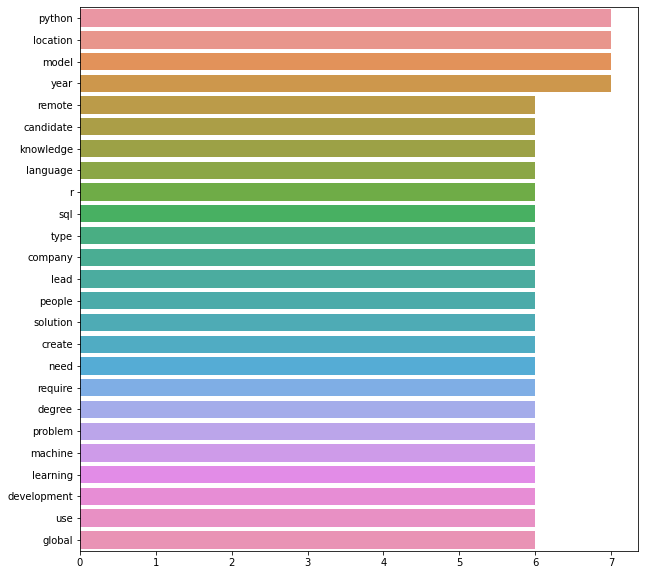

In [60]:
import seaborn as sns
from collections import  Counter

def plot_top_words_barchart(corpus):

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[15:40]:
        x.append(word)
        y.append(count)
    plt.figure(figsize=(10,10))
    sns.barplot(x=y,y=x)
    print(len(counter))
plot_top_words_barchart(corpus)